In [1]:
%matplotlib inline
import lightkurve as lk
import pandas
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table, Column
import lightkurve
import emcee
from lightkurve.lightcurve import LightCurve

In [4]:
tic_id = '259962054'
lcf = lk.search_lightcurvefile('TIC {}'.format(int(tic_id))).download_all()
lcf

LightCurveFileCollection of 5 objects:
	TIC 259962054 (5 TessLightCurveFiles) Sectors: 1,2,3,27,27

NameError: name 'Epoch' is not defined

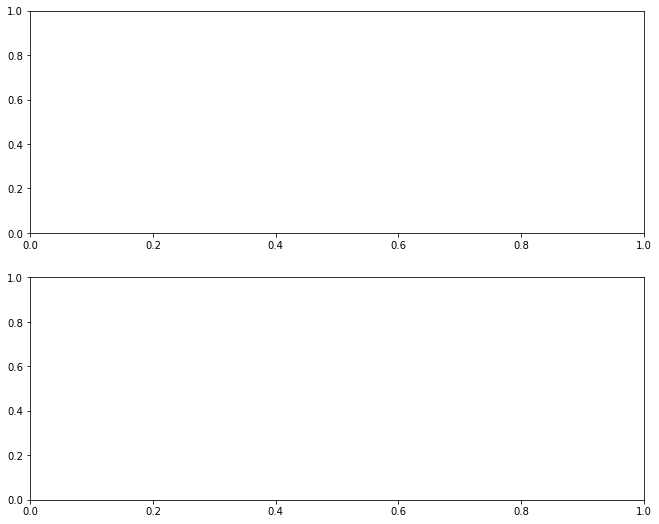

In [5]:
TLC = lcf[2].PDCSAP_FLUX.remove_outliers(sigma=10).normalize()
n = 2

fig, (ax0,ax1) = plt.subplots(2,1,figsize=(11,9))

#init_model = BATMAN(planet_period,planet_radius,t0=Epoch,inc=planet_i,
#                    A=planet_a,LD=[0.31,0.32],t = TLC.time)

ingress = (Epoch+n*planet_period)-(planet_duration/2)/24
egress = (Epoch+n*planet_period)+(planet_duration/2)/24

ax0.scatter(TLC.time, TLC.flux, alpha=0.1,rasterized=True)
ax0.axvspan(ingress, egress, alpha=0.5, color='pink')

ax0.set_ylabel('Normalized Flux')
ax0.set_ylim(0.98,1.02)


ax1.scatter(TLC.bin(binsize=5).time, TLC.bin(binsize=5).flux, alpha=0.2)
ax1.axvspan(ingress, egress, alpha=0.5, color='pink',zorder=-2)
#ax1.plot(TLC.time, init_model, color='k',zorder=-1)

ax1.set_xlim(ingress-0.5, egress+0.5)
ax1.set_ylim(0.99,1.01)
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('BJD TDB')

#plt.savefig('Figs/TOI_203_Third_sector.pdf')
plt.show()